In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from wordcloud import WordCloud
import re
import emoji
import nltk
#nltk.download('punkt')
from nltk import word_tokenize
#nltk.download('stopwords')
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
df = pd.read_csv(r"C:\\Users\\admin\\Desktop\\dishwa\\dmw\\Practical 5\\tweet_data.csv", delimiter = ',', on_bad_lines='skip')

In [3]:
print("1. Find the total number of tweets.")
print(df['tweet_text'].count())

1. Find the total number of tweets.
18727


In [4]:
print("2. Find the total number of unique tweets.")
print(len(df['tweet_text'].unique()))

2. Find the total number of unique tweets.
18615


In [5]:
print("3. Find out the text and sentiments of a particular tweet with the help of IDs associated with it, as well as its index.")
n = int(input("Enter ID: "))
print(df.loc[df['textID'] == n])

3. Find out the text and sentiments of a particular tweet with the help of IDs associated with it, as well as its index.
Enter ID: 1956971206
        textID                                         tweet_text sentiment
10  1956971206  So sleepy again and it's not even that late. I...  negative


In [6]:
print("4. Find out the total number of positive and negative tweets.")
print(df['sentiment'].value_counts())

4. Find out the total number of positive and negative tweets.
positive    9897
negative    8830
Name: sentiment, dtype: int64


DATA VISUALIZATION


5. Plot a graph that shows the above details(4) in percentage.


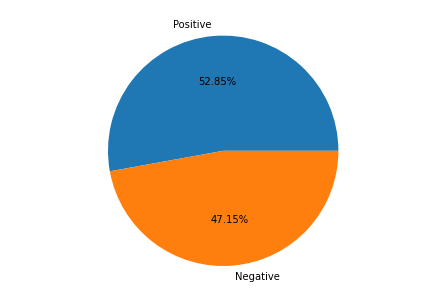

In [7]:
print("DATA VISUALIZATION\n\n")
print("5. Plot a graph that shows the above details(4) in percentage.")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sentiment = ['Positive', 'Negative']
tweets = [9897, 8830]
ax.pie(tweets, labels = sentiment, autopct='%1.2f%%')
plt.show()

6. Plot a word cloud that shows all the words that are most frequently used in positive and negative tweets.


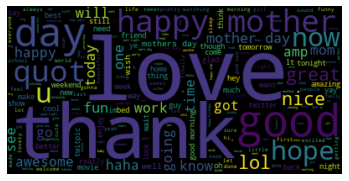

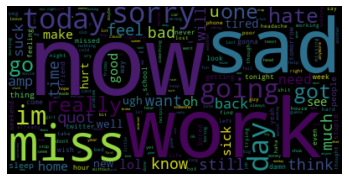

In [8]:
print("6. Plot a word cloud that shows all the words that are most frequently used in positive and negative tweets.")
pos_tweet = df[df['sentiment']=='positive']
neg_tweet = df[df['sentiment']=='negative']
text=" ".join(tweet.lower() for tweet in pos_tweet['tweet_text'])
text1 = " ".join(tweet.lower() for tweet in neg_tweet['tweet_text'])
wordcloud=WordCloud().generate(text)
wordcloud1=WordCloud().generate(text1)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()
plt.imshow(wordcloud1,interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
tweet = "RT @Samantha Yass!! it was soo funn!! #FunTimes 🎉 https://www.abc.in"
print("7. Select any random retweet and Display its actual text by removing RT.")
def replace_retweet(tweet, default_replace = "*Re Tweet*"):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet
print("Tweet without RT: {}".format(replace_retweet(tweet)))

7. Select any random retweet and Display its actual text by removing RT.
Tweet without RT: *Re Tweet*@Samantha Yass!! it was soo funn!! #FunTimes 🎉 https://www.abc.in


In [15]:
print("8. Select any random tweet and remove following things from that: hashtags, @handle, URLs.")
def replace_tag(tweet, default_replace = "*Hash Tag*"):
    tweet = re.sub(r'#\S+', default_replace, tweet)
    return tweet
print("Tweet without hashtag: {}".format(replace_tag(tweet)))
def replace_handle(tweet, default_replace = "*Handle*"):
    tweet = re.sub('\B@\w+', default_replace, tweet)
    return tweet
print("Tweet without @: {}".format(replace_handle(tweet)))
def replace_url(tweet, default_replace = "*URL*"):
    tweet = re.sub(r'http\S+', default_replace, tweet)
    return tweet
print("Tweet without URL: {}".format(replace_url(tweet)))

8. Select any random tweet and remove following things from that: hashtags, @handle, URLs.
Tweet without hashtag: RT @Samantha Yass!! it was soo funn!! *Hash Tag* 🎉 https://www.abc.in
Tweet without @: RT *Handle* Yass!! it was soo funn!! #FunTimes 🎉 https://www.abc.in
Tweet without URL: RT @Samantha Yass!! it was soo funn!! #FunTimes 🎉 *URL*


In [17]:
print("9. Select a random tweet with emoji in it and re-display its actual text by replacing the emoji to word in text.")
def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet
print("Tweet with emoji description: {}".format(demojize(tweet)))

9. Select a random tweet with emoji in it and re-display its actual text by replacing the emoji to word in text.
Tweet with emoji description: RT @Samantha Yass!! it was soo funn!! #FunTimes :party_popper: https://www.abc.in


In [18]:
print("10. Display all stop words available in English Language.")
stopwords = set(stopwords.words('english'))
print(stopwords)

10. Display all stop words available in English Language.
{'very', 'needn', 'and', "hasn't", 'other', 'your', 't', 'haven', 'but', "you're", 'where', 'it', 'until', 'won', 'above', 'no', "you'd", 'ain', 'isn', 'itself', 'out', 'same', "don't", 'doesn', 'i', 'each', 'so', 'she', 'these', 'through', 'of', 'some', 'yourselves', 'this', 'or', 'down', 'there', 'couldn', 'mightn', 'wasn', 'own', 'y', 'being', 'they', "should've", 'be', 'yourself', 'were', 'while', 'my', 'an', 'again', 'should', "weren't", 'any', "it's", 'the', 'me', 'at', 'to', 'a', 'you', 'he', 've', 'on', 'had', 'is', 'ours', "aren't", 'its', 'm', 'o', 'such', 'did', "shouldn't", 'now', 'before', 'll', 'what', "hadn't", 'that', 'themselves', 'further', 'below', 'shan', 'over', 'once', "needn't", 'her', 'hers', 'can', 'when', "she's", "doesn't", 'just', 'here', 'ourselves', 'having', 're', 'weren', 'himself', 'our', "wouldn't", "won't", 'during', 'then', 'why', "mightn't", "isn't", 'for', 'only', "you'll", 'him', 'how', 's'

In [19]:
print("11. Perform tokenization on some raw text and display statements as well as words.")
tweet = "Hii everyone, Dishwa here!"
def tokenize(tweet):
  token = word_tokenize(tweet)
  return token
print(tokenize(tweet))

11. Perform tokenization on some raw text and display statements as well as words.
['Hii', 'everyone', ',', 'Dishwa', 'here', '!']
